Our problem is to know which person is approve to take a loan next time base on some feature like:
+ Education
+ employment
+ Income
+ loan amount
+ loan term
+ cibil_score
+ residential_assets_value
+ other

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

# Process Dataset

In [2]:
data = pd.read_csv("loan_approval_dataset.csv")
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [5]:
data.isna().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [8]:
data.columns = data.columns.str.strip()

In [9]:
data["education"].unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [10]:
data["education"] = data["education"].str.strip().replace({"Graduate": 1, "Not Graduate": 0})
data["self_employed"] = data["self_employed"].str.strip().replace({"Yes": 1, "No": 0})
data["loan_status"] = data["loan_status"].str.strip().replace({"Approved": 1, "Rejected": 0})

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18056\767458302.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["education"] = data["education"].str.strip().replace({"Graduate": 1, "Not Graduate": 0})
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18056\767458302.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["self_employed"] = data["self_employed"].str.strip().replace({"Yes": 1, "No": 0})
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18056\767458302.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and w

In [11]:
data = data.drop(columns="loan_id")
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


# Exploratory Data Analysis (EDA)

# Analyze Data Distributions and Relationships

In [12]:
data.describe()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
count,4269.000000,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269.000000
mean,2.498712,0.502225,0.503631,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,0.622160
std,1.695910,0.500054,0.500045,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,0.484904
min,0.000000,0.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,0.000000
25%,1.000000,0.000000,0.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,0.000000
50%,3.000000,1.000000,1.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,1.000000
75%,4.000000,1.000000,1.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,1.000000
max,5.000000,1.000000,1.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07,1.000000


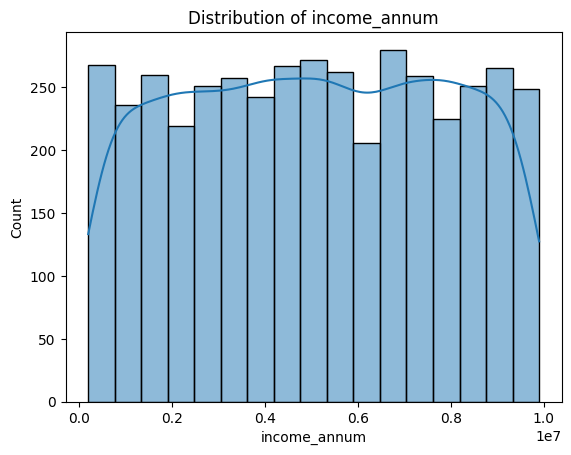

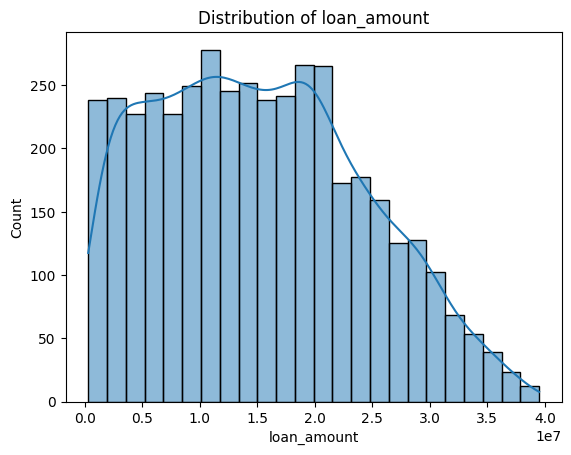

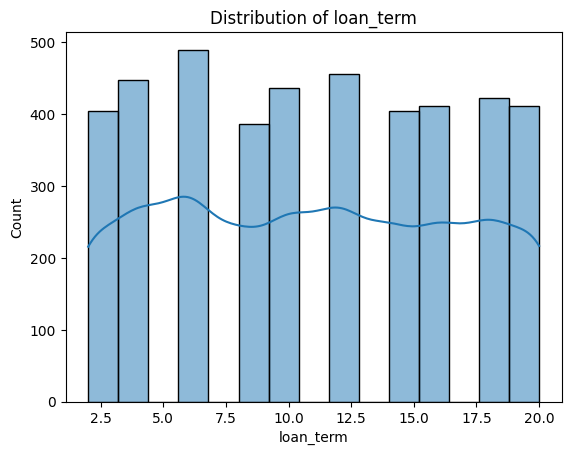

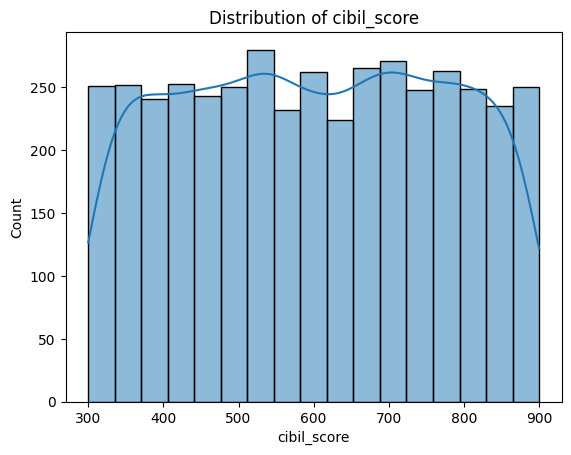

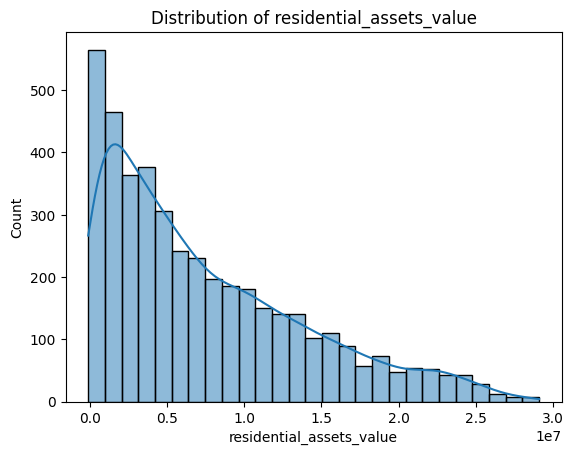

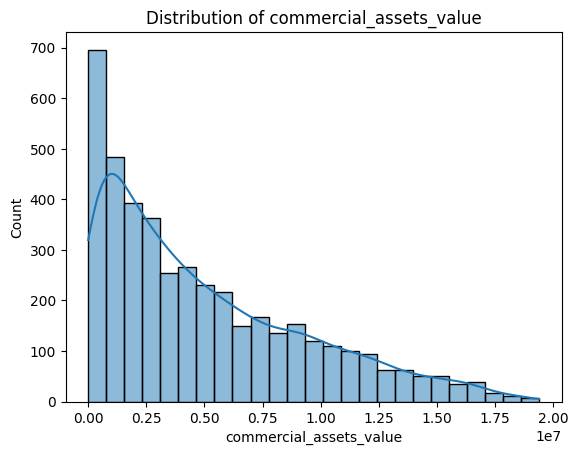

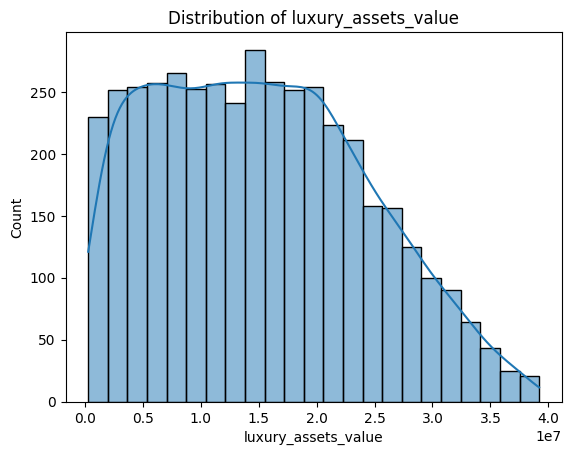

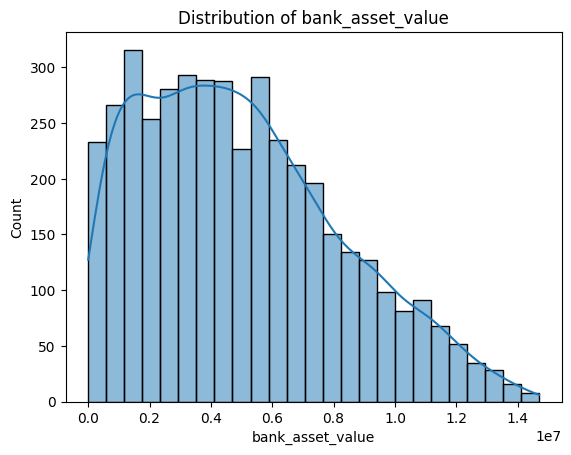

In [13]:
# Show each distribution of feature

import seaborn as sns

numerical_features = ['income_annum', 'loan_amount', 'loan_term', 'cibil_score', 
                      'residential_assets_value', 'commercial_assets_value', 
                      'luxury_assets_value', 'bank_asset_value']

for feature in numerical_features:
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


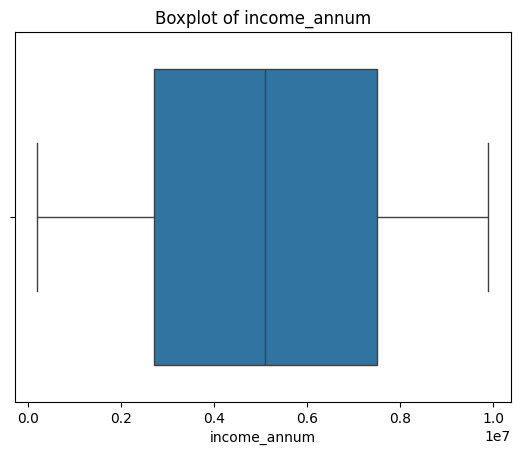

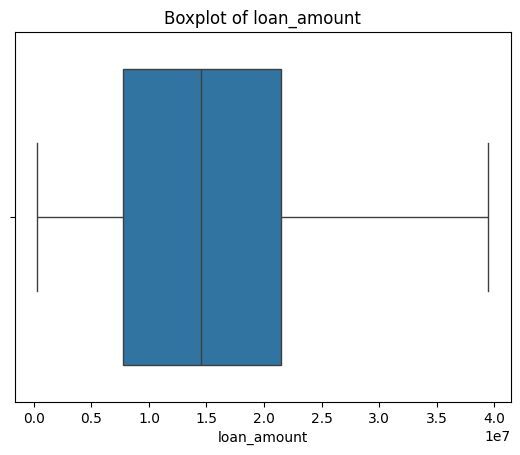

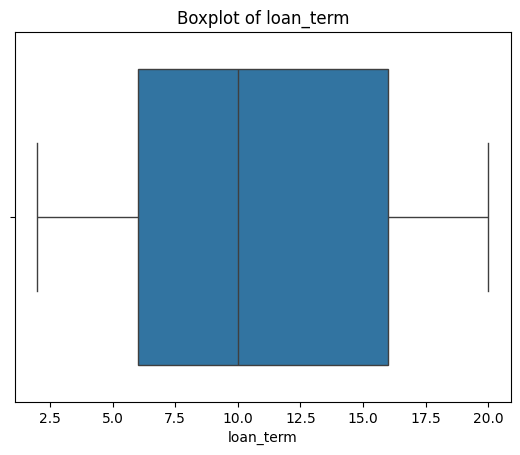

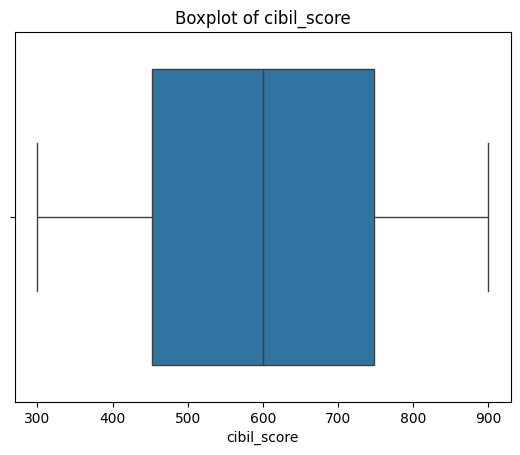

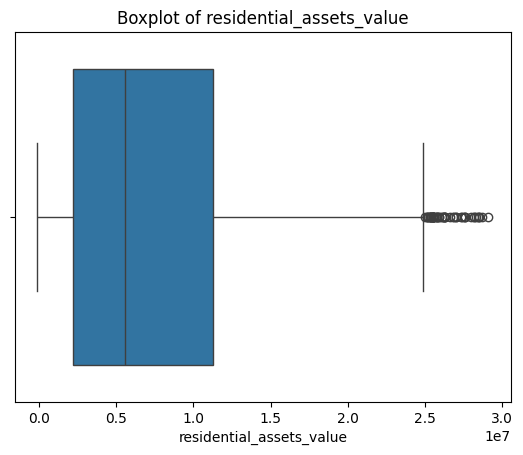

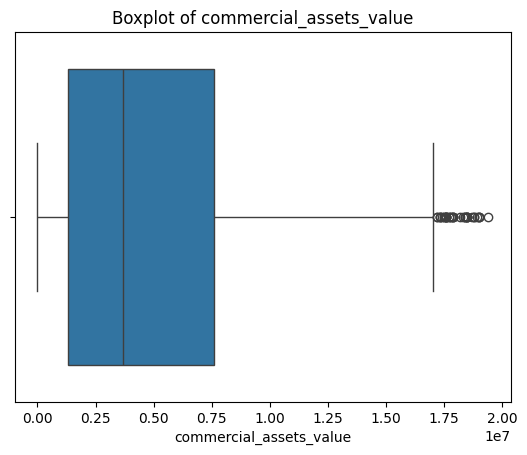

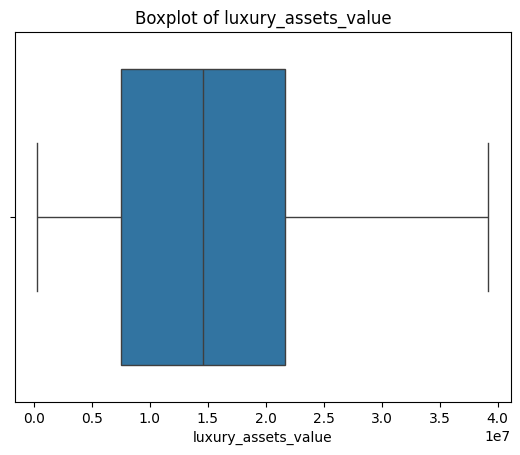

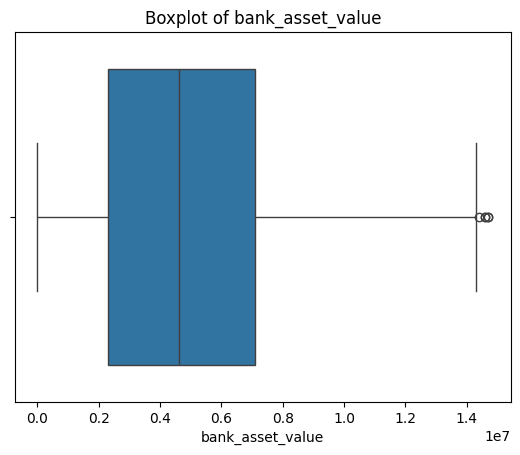

In [14]:
for feature in numerical_features:
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()


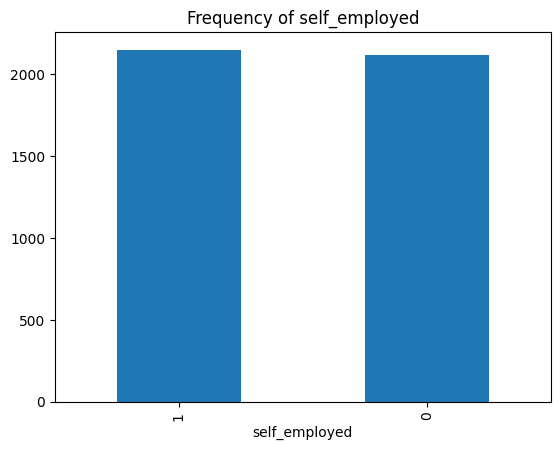

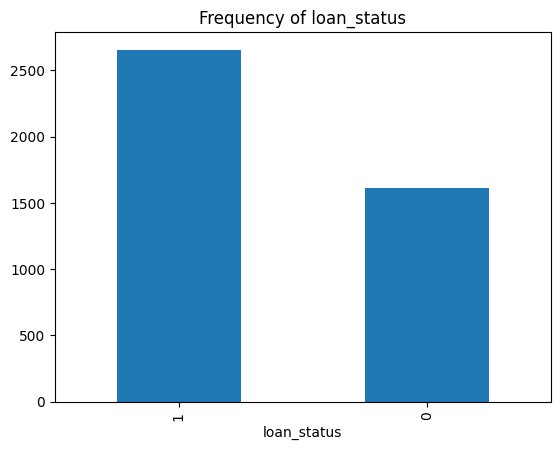

In [15]:
categorical_features = ['self_employed', 'loan_status']

for feature in categorical_features:
    data[feature].value_counts().plot(kind='bar')
    plt.title(f'Frequency of {feature}')
    plt.show()


# Identify Feature Importance through Visualizations

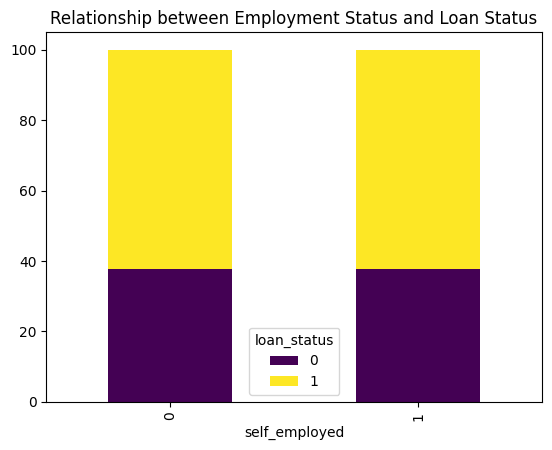

In [16]:
cross_tab = pd.crosstab(data['self_employed'], data['loan_status'], normalize='index') * 100
cross_tab.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Relationship between Employment Status and Loan Status')
plt.show()


Base on the graph show that being employment doesing affect the loan approvement at all

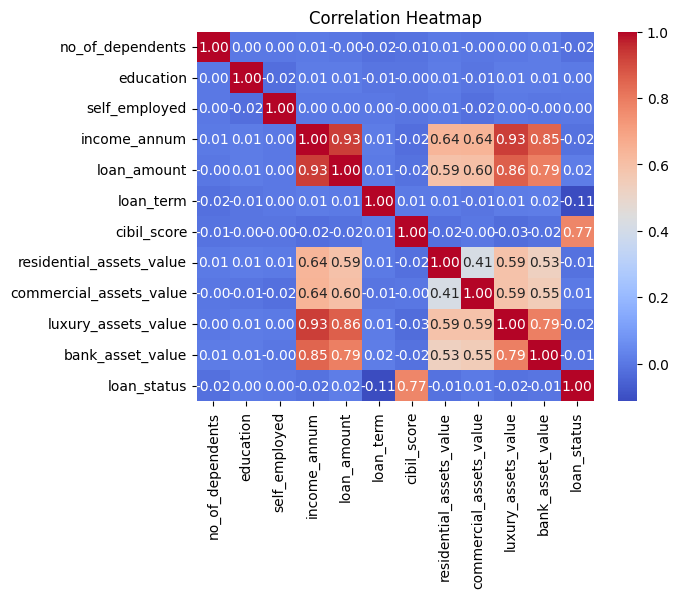

In [14]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


This heatmap show that cibil_score strongly associated with laon approval

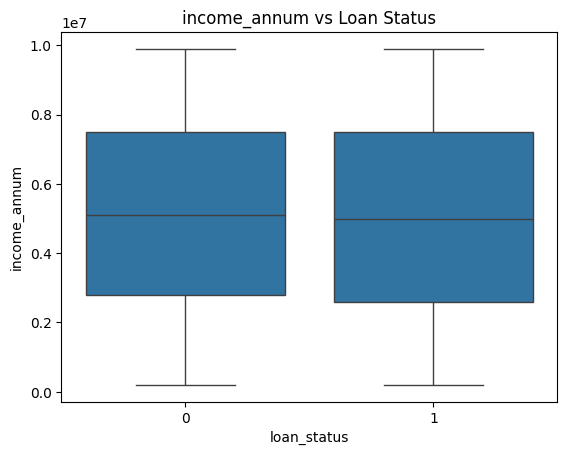

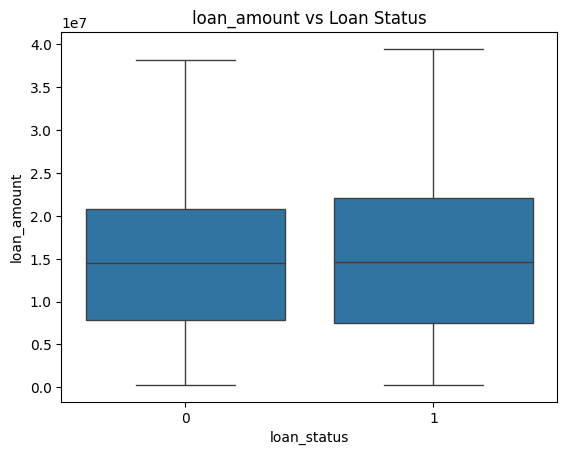

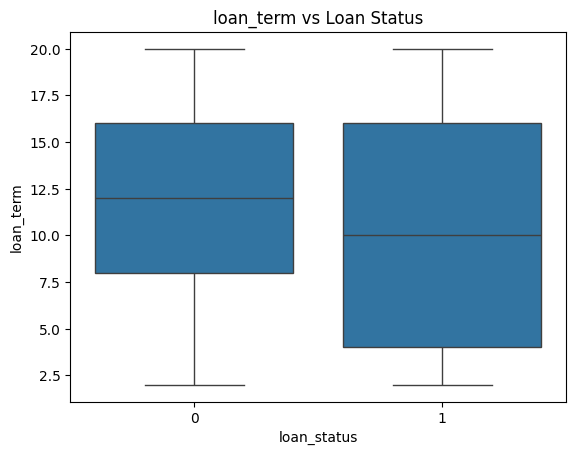

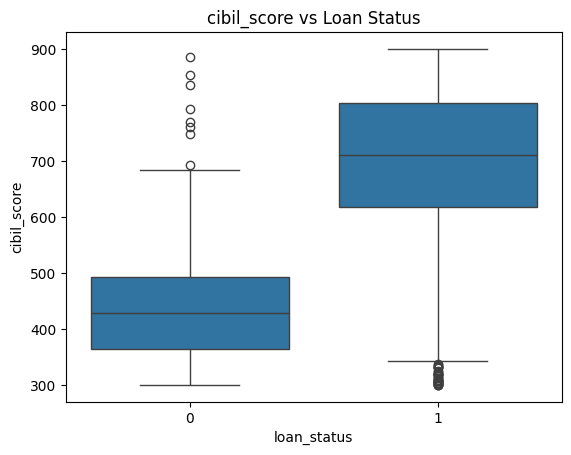

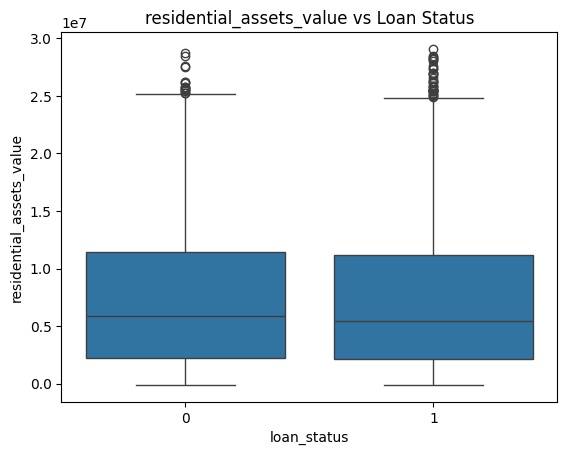

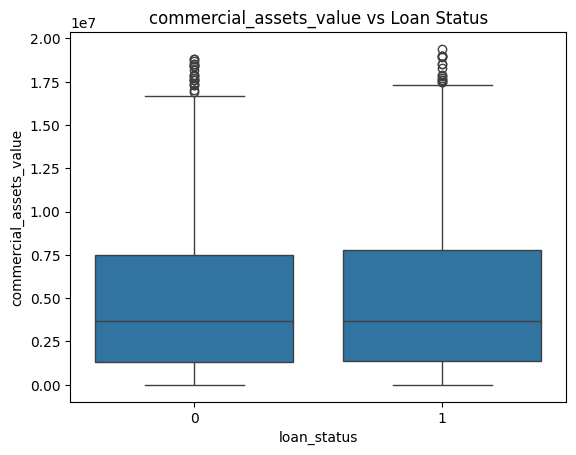

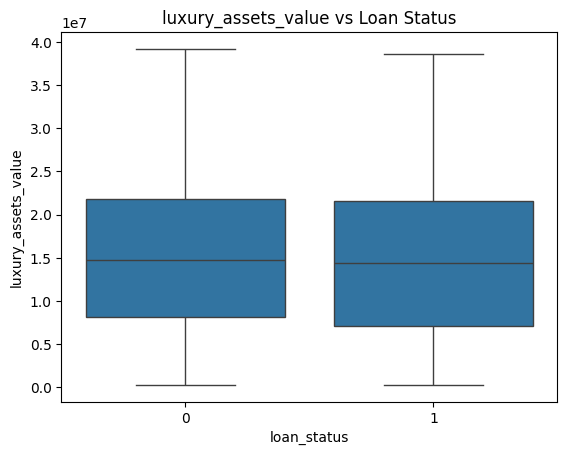

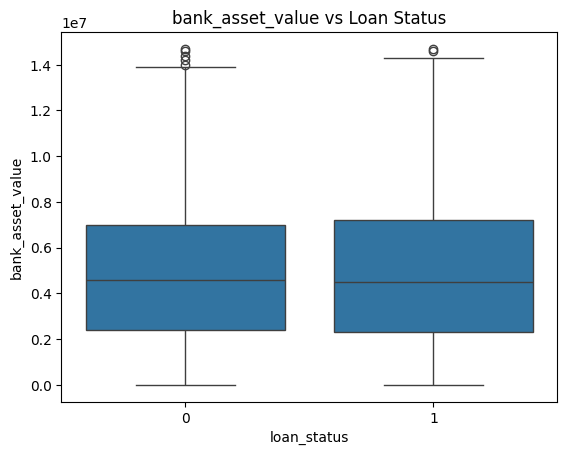

In [18]:
for feature in numerical_features:
    sns.boxplot(x='loan_status', y=feature, data=data)
    plt.title(f'{feature} vs Loan Status')
    plt.show()

# By observer the plot above we can see some special relation of one feature and target and also some clue about the feature which is: 
+ This heatmap show that the higer cibil_score strongly associated with laon approval
+ people with higher asset values (residential_assets_value, luxury_assets_value) have no better or bad approval rates at all
+ income_annum compare between approved and rejected loans is have no corrilation. 

# Examine Class Imbalances in loan_status

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18056\4063544328.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_status', data=data, palette='viridis')


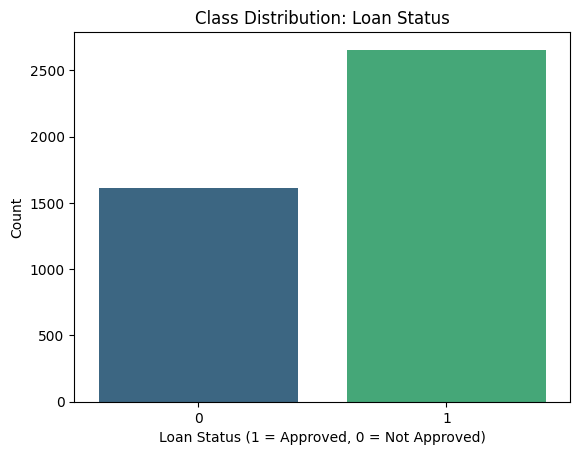

Class Proportions (%):
loan_status
1    62.215976
0    37.784024
Name: proportion, dtype: float64


In [15]:
# data['loan_status'].value_counts().plot(kind='bar', color=['green', 'red'])
# plt.title('Loan Status Distribution')
# plt.show()

# Count plot for loan_status
sns.countplot(x='loan_status', data=data, palette='viridis')
plt.title('Class Distribution: Loan Status')
plt.xlabel('Loan Status (1 = Approved, 0 = Not Approved)')
plt.ylabel('Count')
plt.show()

# Display class proportions
class_proportions = data['loan_status'].value_counts(normalize=True) * 100
print("Class Proportions (%):")
print(class_proportions)

The dataset exhibits a class imbalance, with 62.22% of loans being approved and 37.78% rejected. This imbalance can influence model performance, as the model may favor the majority class (Approved) over the minority class (Not Approved). To ensure robust predictions, techniques like oversampling, undersampling, or class weighting can be employed

In [20]:
data.shape

(4269, 12)

In [21]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into features (X) and target (y)
X = data['cibil_score']
X = X.values.reshape(-1,1)
y = data['loan_status']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print("Class distri bution after SMOTE:")
print(y_train_smote.value_counts())


Class distri bution after SMOTE:
loan_status
1    1859
0    1859
Name: count, dtype: int64


After balancce the target we can now move to train model

# Model Development

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [23]:
model1 = LogisticRegression(max_iter=500,random_state=42)
# Specify multiple scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Perform cross-validation
cv_results = cross_validate(model1, X_train_smote, y_train_smote, cv=5, scoring=scoring)

# Display results
for metric in scoring:
    print(f"{metric.capitalize()}: {cv_results['test_' + metric].mean():.2f}")

Accuracy: 0.96
Precision: 0.98
Recall: 0.93
F1: 0.95
Roc_auc: 0.96


In [24]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# Specify multiple scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Perform cross-validation
cv_results = cross_validate(rf_model, X_train_smote, y_train_smote, cv=5, scoring=scoring)

# Display results
for metric in scoring:
    print(f"{metric.capitalize()}: {cv_results['test_' + metric].mean():.2f}")

Accuracy: 0.96
Precision: 0.98
Recall: 0.93
F1: 0.95
Roc_auc: 0.96


In [25]:
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
# Specify multiple scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Perform cross-validation
cv_results = cross_validate(xgb_model, X_train_smote, y_train_smote, cv=5, scoring=scoring)

# Display results
for metric in scoring:
    print(f"{metric.capitalize()}: {cv_results['test_' + metric].mean():.2f}")

Accuracy: 0.96
Precision: 0.99
Recall: 0.93
F1: 0.96
Roc_auc: 0.96


In [26]:
from sklearn.svm import SVC

# Initialize SVM with RBF kernel
svm_model = SVC(kernel='rbf', probability=True, random_state=42)

# Perform cross-validation
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
svm_cv_results = cross_validate(svm_model, X_train_smote, y_train_smote, cv=5, scoring=scoring)

# Display average scores
print("SVM Performance:")
for metric in scoring:
    print(f"{metric.capitalize()}: {svm_cv_results['test_' + metric].mean():.2f}")


SVM Performance:
Accuracy: 0.94
Precision: 0.99
Recall: 0.90
F1: 0.94
Roc_auc: 0.96


In [27]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN
knn_model = KNeighborsClassifier(n_neighbors=5)

# Perform cross-validation
knn_cv_results = cross_validate(knn_model, X_train_smote, y_train_smote, cv=5, scoring=scoring)

# Display average scores
print("KNN Performance:")
for metric in scoring:
    print(f"{metric.capitalize()}: {knn_cv_results['test_' + metric].mean():.2f}")


KNN Performance:
Accuracy: 0.96
Precision: 0.98
Recall: 0.93
F1: 0.95
Roc_auc: 0.96


In [28]:
from sklearn.neural_network import MLPClassifier

# Initialize Neural Network
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', max_iter=300, random_state=42)

# Perform cross-validation
mlp_cv_results = cross_validate(mlp_model, X_train_smote, y_train_smote, cv=5, scoring=scoring)

# Display average scores
print("Neural Network Performance:")
for metric in scoring:
    print(f"{metric.capitalize()}: {mlp_cv_results['test_' + metric].mean():.2f}")


Neural Network Performance:
Accuracy: 0.92
Precision: 0.97
Recall: 0.88
F1: 0.92
Roc_auc: 0.96


After do CV across the model, i decide to use XGBClassifier because it's Excellent for structured/tabular data, often outperforming other algorithms in competitions.

In [29]:
from sklearn.model_selection import GridSearchCV

# Define model and parameter grid
model = XGBClassifier()
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6,0.8, 1.0],
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1', verbose=5, n_jobs=-1)
grid_search.fit(X_train_smote, y_train_smote)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.6}
Best F1 Score: 0.9566553801537175


In [30]:
XGB_model0 = XGBClassifier()
XGB_model0.fit(X_train_smote,y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [31]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = XGB_model0.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, XGB_model0.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       484
           1       1.00      0.93      0.96       797

    accuracy                           0.96      1281
   macro avg       0.95      0.96      0.95      1281
weighted avg       0.96      0.96      0.96      1281

ROC-AUC: 0.9629187967273971


In [32]:
XGB_model = XGBClassifier(learning_rate= 0.01, max_depth= 3, n_estimators= 100, subsample= 0.6)

In [33]:
XGB_model.fit(X_train_smote,y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [34]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = XGB_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, XGB_model.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       484
           1       1.00      0.93      0.96       797

    accuracy                           0.96      1281
   macro avg       0.95      0.96      0.95      1281
weighted avg       0.96      0.96      0.96      1281

ROC-AUC: 0.9638002011676015


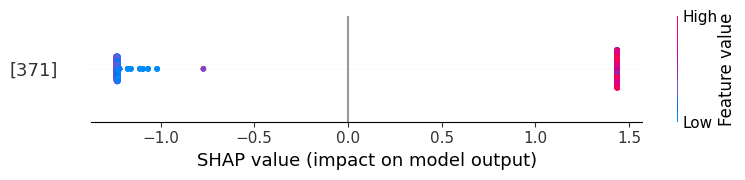

In [35]:
import shap
# Explain predictions with SHAP
explainer = shap.TreeExplainer(XGB_model)
shap_values = explainer.shap_values(X_test)

# Visualize SHAP values
shap.summary_plot(shap_values, X_test, feature_names=X_train)

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report		

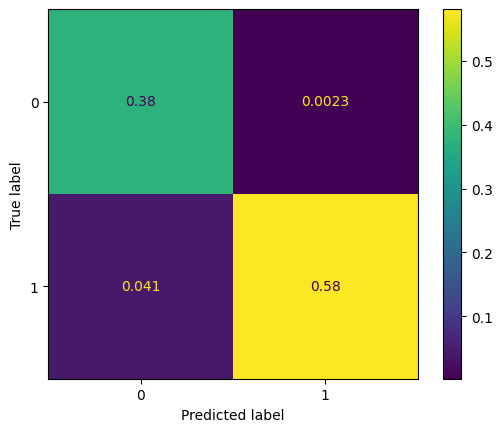

In [37]:
con_matric = confusion_matrix(y_test,y_pred,normalize = "all")
display = ConfusionMatrixDisplay(con_matric)
display.plot()


In [38]:
import joblib

# Save the model
joblib.dump(XGB_model, 'XGBClassifier_model.pkl')

['XGBClassifier_model.pkl']

In [47]:
# Load the model
XGB_model_loaded = joblib.load('XGBClassifier_model.pkl')

# Make predictions
new_predictions = XGB_model_loaded.predict(599)
print(new_predictions)


[1]


# Since there are a good accuracy of this model we can just stop it here but as i am curious if we put another feature that have some realtion with target is there any change or not.

In [25]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into features (X) and target (y)
X_2 = data[['cibil_score','loan_amount']]
X_2 = X_2.values
y_2 = data['loan_status']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.3, random_state=42, stratify=y_2)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print("Class distri bution after SMOTE:")
print(y_train_smote.value_counts())


Class distri bution after SMOTE:
loan_status
1    1859
0    1859
Name: count, dtype: int64


In [26]:
XGB_model1 = XGBClassifier()
XGB_model1.fit(X_train_smote,y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [29]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = XGB_model1.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, XGB_model1.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       484
           1       0.98      0.94      0.96       797

    accuracy                           0.95      1281
   macro avg       0.94      0.95      0.95      1281
weighted avg       0.95      0.95      0.95      1281

ROC-AUC: 0.9715669297054035


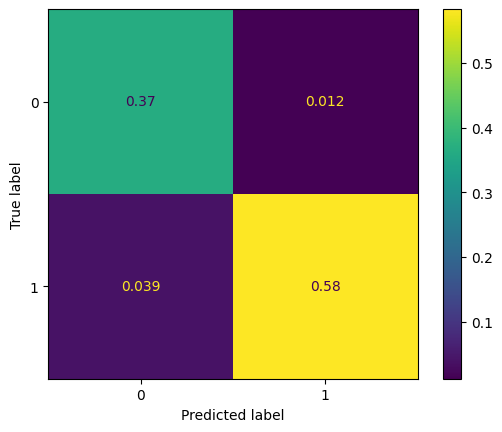

In [30]:
con_matric = confusion_matrix(y_test,y_pred,normalize = "all")
display = ConfusionMatrixDisplay(con_matric)
display.plot()


# Overall, I would choose the second model because a higher ROC-AUC usually indicates a stronger classifier, even if the accuracy is slightly lower. 

### ROC-AUC (Overall classification performance):

### First model: 0.964

### Second model: 0.972

✅ Second model is better in ROC-AUC, which means it has a better ability to distinguish between the classes.

In [31]:
import joblib

# Save the model
joblib.dump(XGB_model1, 'XGBClassifier_model1.pkl')

['XGBClassifier_model1.pkl']

In [44]:
# Load the model
XGB_model_loaded = joblib.load('XGBClassifier_model1.pkl')

# Make predictions
new_data = np.array([[600, 156775]])  # Ensure the input has the same number of features as the trained model
new_predictions = XGB_model_loaded.predict(new_data)
print(new_predictions)


[1]
